In [68]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
ads = pd.read_csv('advertising.csv')
ads.sample(5)

,TV,Radio,Newspaper,Sales
50,199.8,3.1,34.6,16.4
3,151.5,41.3,58.5,16.5
12,23.8,35.1,65.9,9.2
39,228.0,37.7,32.0,21.5
43,206.9,8.4,26.4,17.9


In [70]:
len(ads.index)

200

<Figure size 504x504 with 0 Axes>

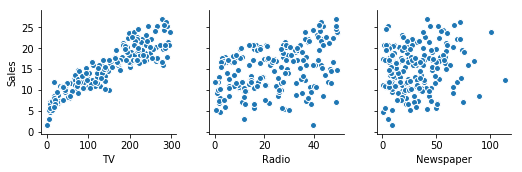

In [71]:
plt.figure(figsize=(7,7))
sns.pairplot(data=ads,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

In [72]:
df = ads.loc[:,['TV','Sales']]
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


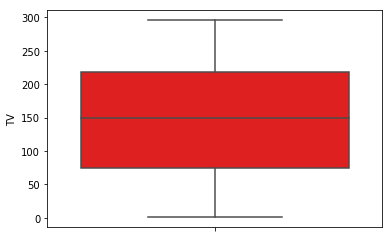

In [73]:
sns.boxplot(y = df.TV,color='red')

In [74]:
cols = df.columns
scaler =MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols]) 

In [75]:
df.head()

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.409449
3,0.509976,0.586614
4,0.609063,0.641732


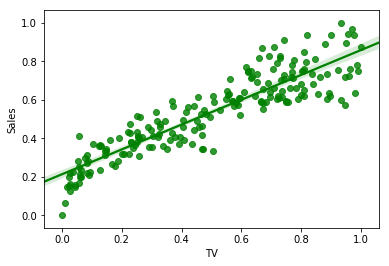

In [76]:
sns.regplot(data=df,x = 'TV',y='Sales',color='green')
plt.show()

In [77]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)
print("Train Size:{0},Test Size:{1}".format(len(df_train),len(df_test)))

Train Size:140,Test Size:60


In [78]:
y_train = df_train.pop('Sales')
X_train = df_train
X_train = X_train.values.reshape(-1,1)

y_test = df_test.pop('Sales')
X_test = df_test
X_test = X_test.values.reshape(-1,1)

In [80]:

degrees = [1,2,3,6,10,20]

y_train_pred = np.zeros((len(X_train),len(degrees))) 
y_test_pred = np.zeros((len(X_test),len(degrees)))

for i,degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(X_train,y_train)
    
    y_train_pred[:,i] = model.predict(X_train)
    y_test_pred[:,i] = model.predict(X_test)

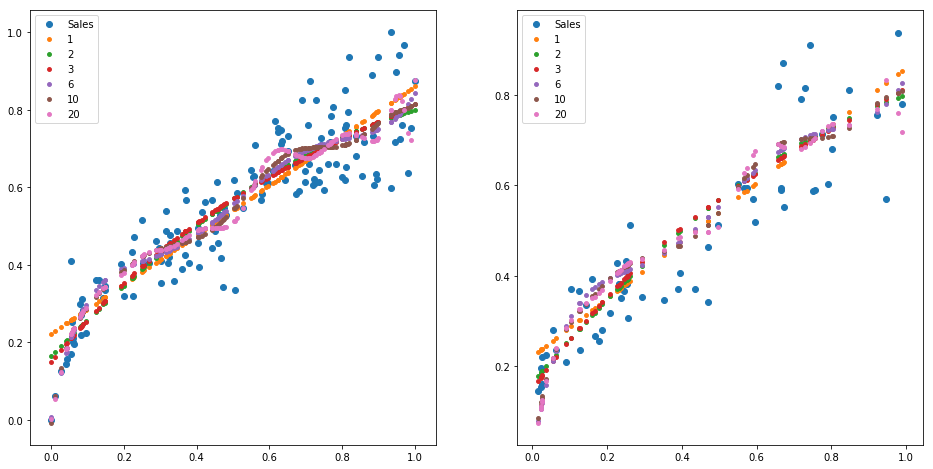

In [81]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
# plt.yscale('log')
for i,degree in enumerate(degrees):
    plt.scatter(X_train,y_train_pred[:,i],s=15,label = degree)
    plt.legend(loc = 'upper left')
    
plt.subplot(1,2,2)
plt.scatter(X_test,y_test)
# plt.yscale('log')
for i,degree in enumerate(degrees):
    plt.scatter(X_test,y_test_pred[:,i],s=15,label = degree)
    plt.legend(loc = 'upper left')    


In [82]:
for i,degree in enumerate(degrees):
    train_r2 = round(r2_score(X_train,y_train_pred[:,i]),2)
    test_r2 = round(r2_score(X_test,y_test_pred[:,i]),2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))
      

Polynomial degree 1: train score=0.86, test score=0.81
Polynomial degree 2: train score=0.85, test score=0.83
Polynomial degree 3: train score=0.85, test score=0.83
Polynomial degree 6: train score=0.84, test score=0.8
Polynomial degree 10: train score=0.84, test score=0.8
Polynomial degree 20: train score=0.83, test score=0.79


In [83]:
df_train,df_test = train_test_split(ads,train_size=0.7,test_size=0.3,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cols = df_train.columns
df_train[cols] = scale.fit_transform(df_train[cols])
df_test[cols] = scale.transform(df_test[cols])

In [85]:
df_train.describe()

,TV,Radio,Newspaper,Sales
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,-2.283887e-16,1.054712e-16,2.696256e-17,9.516197e-17
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-1.862320e+00,-1.613156e+00,-1.461744e+00,-2.766458e+00
25%,-7.579491e-01,-8.760071e-01,-8.847624e-01,-7.426453e-01
50%,1.173535e-01,-3.942889e-02,-2.205066e-01,1.887963e-01
75%,7.997726e-01,9.120074e-01,7.176941e-01,7.496120e-01
max,1.674776e+00,1.788015e+00,3.415930e+00,2.188226e+00


In [86]:
df_test.head()

,TV,Radio,Newspaper,Sales
95,0.082664,0.553719,1.088611,0.218056
15,0.466637,1.657728,1.088611,1.290921
30,1.632910,0.327431,0.618298,1.095855
158,-1.730740,0.917150,0.715270,-1.654580
128,0.764485,1.746871,-1.321135,1.739574


In [87]:
y_train = df_train.pop('Sales')
X_train = df_train

y_test = df_test.pop('Sales')
X_test = df_test

In [88]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=2)
rfe = rfe.fit(X_train,y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TV', True, 1), ('Radio', True, 1), ('Newspaper', False, 2)]

In [90]:
y_pred = rfe.predict(X_test)
r2_score(y_test,y_pred)

0.9139189919346896

In [91]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=3)
rfe = rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
r2_score(y_test,y_pred)

0.9091484341849799

In [93]:
lm = LinearRegression()
scores = cross_val_score(lm,X_train,y_train,scoring='r2',cv=5)
scores

array([0.87620545, 0.88592805, 0.87119676, 0.92292763, 0.85099336])

In [94]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

array([0.85070069, 0.89674516, 0.89095335, 0.88205848, 0.87292599])

In [95]:
len(X_train.columns)

3

In [100]:
# Step 1 Creating cross validation scheme
folds  = KFold(n_splits = 5,shuffle=True,random_state=42)

# Specify number of hyperparameter to tune

huper_param = {'n_features_to_select':list(range(1,4))}


# Specify model

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)


# Call Grid search CV

model_cv = GridSearchCV(estimator=rfe,param_grid=huper_param,scoring='r2',cv=folds, verbose=1,return_train_score=True)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_features_to_select': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [104]:
cv_result = pd.DataFrame(model_cv.cv_results_)

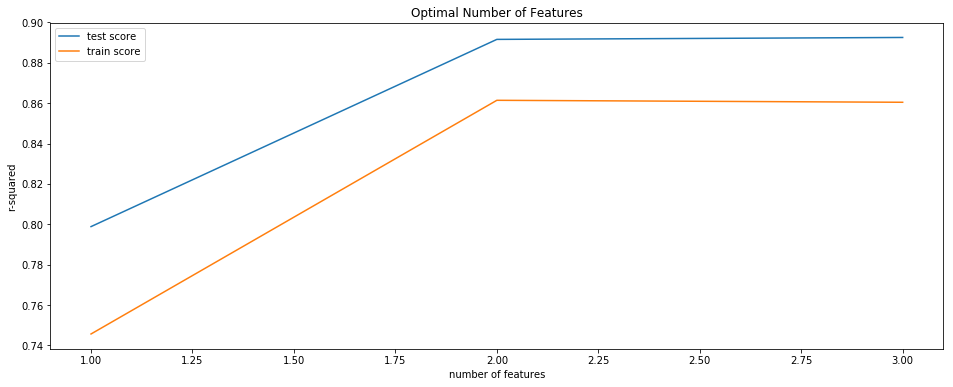

In [111]:
plt.figure(figsize=(16,6))
plt.plot(cv_result.param_n_features_to_select,cv_result.mean_train_score)
plt.plot(cv_result["param_n_features_to_select"], cv_result["mean_test_score"])

plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [117]:
# final model
n_features_optimal = 2

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.9139189919346896
